#Klasifikasi Sinyal Pulsar Menggunakan Algoritma Data Mining pada Dataset HTRU2 Pulsar

#Pendahuluan – HTRU2 Pulsar Dataset



Pulsar adalah bintang neutron berotasi cepat yang memancarkan sinyal radio berkala. Deteksi pulsar sangat penting dalam bidang astrofisika karena dapat memberikan wawasan tentang evolusi bintang, gelombang gravitasi, dan struktur alam semesta. Namun, proses deteksi pulsar dalam data sinyal radio sangat kompleks, karena sebagian besar sinyal berasal dari sumber non-pulsar, sehingga membutuhkan penyaringan dan analisis data yang sangat teliti.

Dengan perkembangan data mining dan machine learning, analisis sinyal radio dari survei teleskop radio dapat dilakukan secara otomatis untuk memprediksi apakah suatu sinyal merupakan sinyal pulsar atau bukan. Salah satu dataset populer yang digunakan untuk tujuan ini adalah HTRU2 (High Time Resolution Universe Survey 2), yang berisi data statistik dari sinyal radio berdasarkan hasil observasi teleskop.

Melalui penerapan algoritma klasifikasi pada dataset HTRU2, diharapkan dapat dibangun model prediktif yang mampu membedakan sinyal pulsar dan non-pulsar dengan akurasi tinggi, sehingga mempercepat proses deteksi dan mengurangi beban kerja manual para astronom.

#Data Understanding – HTRU2 Pulsar Dataset

##Sumber Data
Dataset diambil dari link berikut ini:

🔗 https://archive.ics.uci.edu/dataset/372/htru2

Dataset HTRU2 yang tersedia di UCI Machine Learning Repository berasal dari hasil survei menggunakan teleskop Parkes, Australia, dalam proyek High Time Resolution Universe Survey. Dataset ini terdiri dari pengukuran statistik sinyal radio dari lebih dari 17.000 observasi, dengan 8 fitur numerik yang menggambarkan karakteristik sinyal, seperti mean profile, standard deviation, skewness, dan kurtosis. Target atau label dari setiap data adalah 0 (non-pulsar) atau 1 (pulsar), sehingga cocok digunakan untuk klasifikasi biner.

##Tujuan

Dataset ini digunakan untuk mengembangkan model klasifikasi dalam membedakan sinyal pulsar dan non-pulsar berdasarkan karakteristik statistik sinyal radio. Model ini bertujuan untuk membantu dalam proses deteksi otomatis sinyal pulsar dengan efisiensi dan akurasi tinggi, serta mendukung penelitian dan eksplorasi lebih lanjut dalam bidang astrofisika dan ilmu ruang angkasa.

##Integrasi Data

Untuk dapat mengolah dataset HTRU2 Pulsar, diperlukan proses pengambilan data dari UCI Machine Learning Repository. Dataset ini dapat diunduh secara manual melalui tautan yang tersedia, atau diimpor langsung ke dalam program Python menggunakan pustaka seperti pandas.

UCI tidak menyediakan package khusus untuk instalasi otomatis, namun file CSV dari dataset dapat langsung diakses dan dibaca menggunakan perintah seperti berikut:

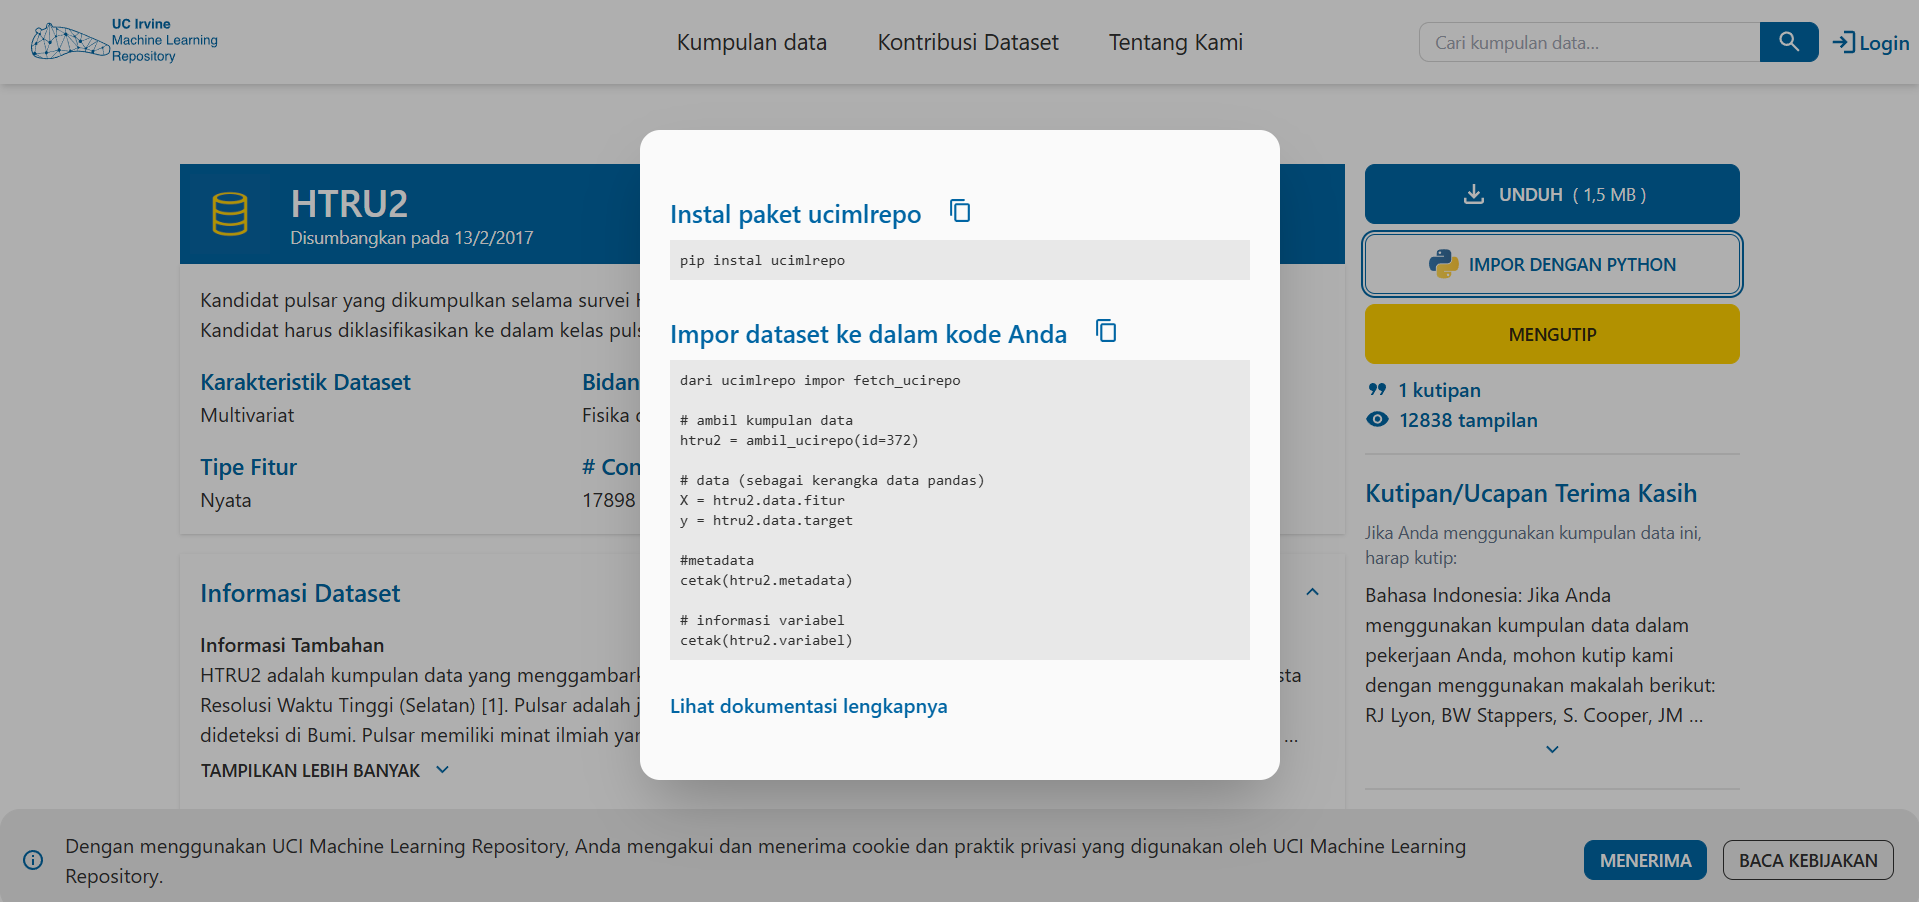

In [32]:
pip install ucimlrepo

In [33]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
htru2 = fetch_ucirepo(id=372)

# data (as pandas dataframes)
X = htru2.data.features
y = htru2.data.targets

# gabungkan fitur dan target menjadi satu DataFrame
data = htru2.data.original

# menyimpan hasil komputasi ke dalam csv
data.to_csv("htru2.csv", index=True)

# menampilkan info fitur-fitur yang ada di tabel
print(data.info())

# menampilkan 5 baris pertama
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Profile_mean      17898 non-null  float64
 1   Profile_stdev     17898 non-null  float64
 2   Profile_skewness  17898 non-null  float64
 3   Profile_kurtosis  17898 non-null  float64
 4   DM_mean           17898 non-null  float64
 5   DM_stdev          17898 non-null  float64
 6   DM_skewness       17898 non-null  float64
 7   DM_kurtosis       17898 non-null  float64
 8   class             17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB
None
   Profile_mean  Profile_stdev  Profile_skewness  Profile_kurtosis   DM_mean  \
0    140.562500      55.683782         -0.234571         -0.699648  3.199833   
1    102.507812      58.882430          0.465318         -0.515088  1.677258   
2    103.015625      39.341649          0.323328          1.051164  3.121237   


##Eksplorasi Data

###Visualisasi Data

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


<Figure size 1200x1000 with 0 Axes>

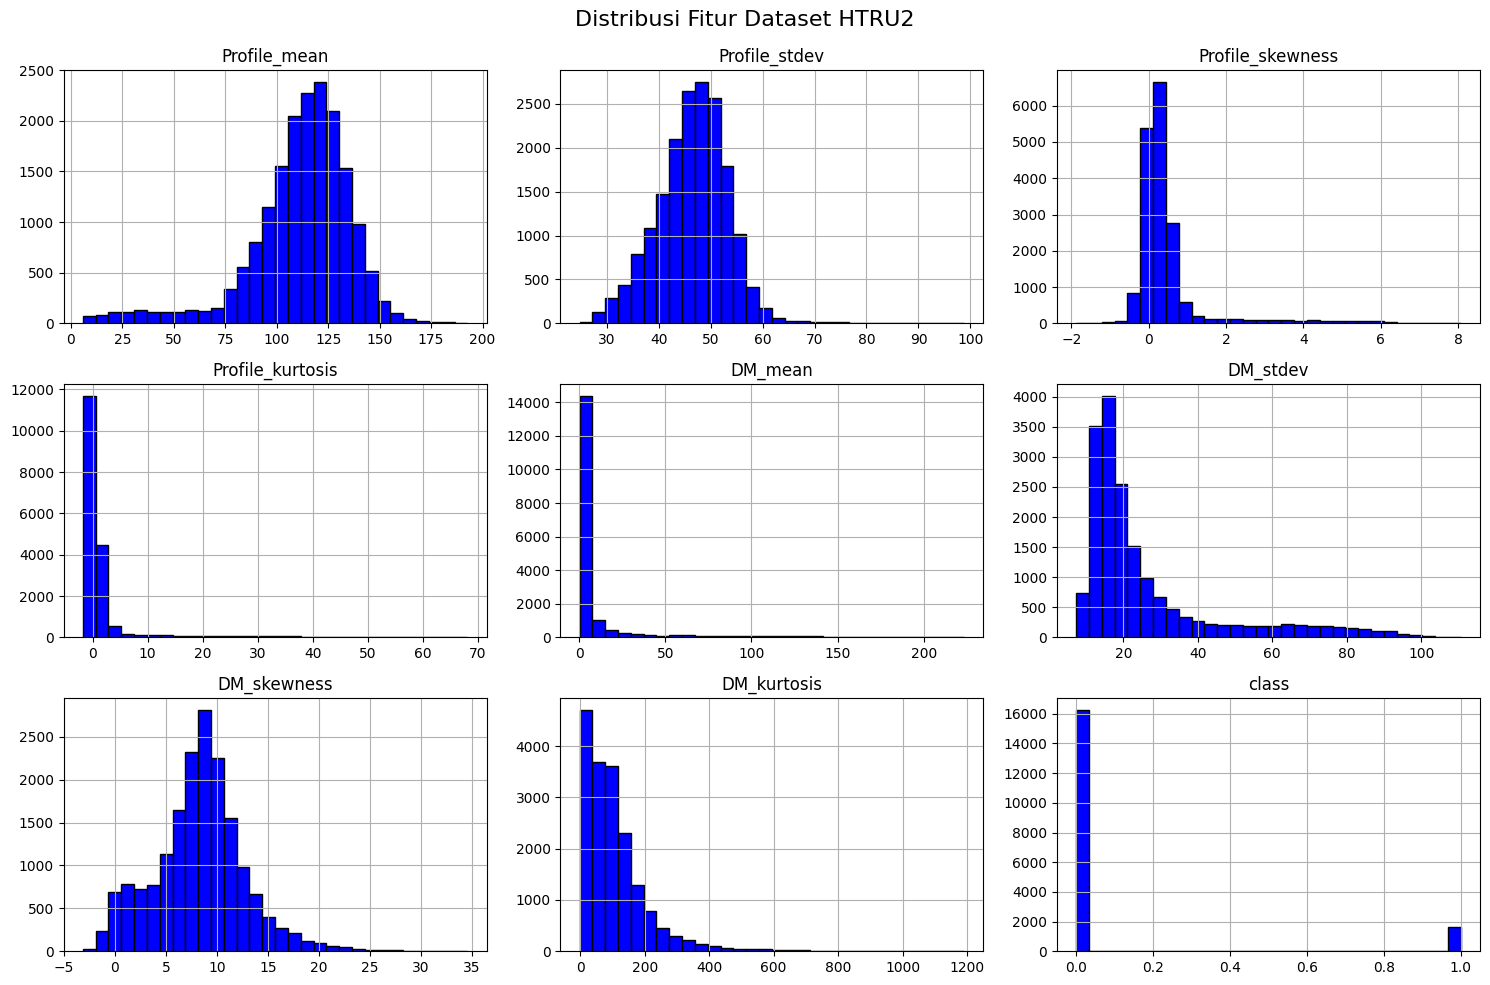

In [34]:
display(data) #display dataset

# 📊 Visualisasi Distribusi Fitur dengan Histogram

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
data.hist(bins=30, figsize=(15, 10), color='blue', edgecolor='black')
plt.suptitle('Distribusi Fitur Dataset HTRU2', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Supaya judul tidak terpotong
plt.show()


###Struktur Data

####Fitur dan Label

In [35]:
data.shape  # untuk mengetahui bentuk dataset (baris & kolom)

(17898, 9)

Dataset HTRU2 memiliki 17.898 baris dan 9 kolom.

In [36]:
data.columns  # untuk mengetahui nama-nama kolom pada dataset

Index(['Profile_mean', 'Profile_stdev', 'Profile_skewness', 'Profile_kurtosis',
       'DM_mean', 'DM_stdev', 'DM_skewness', 'DM_kurtosis', 'class'],
      dtype='object')

Fitur adalah variabel independen yang digunakan sebagai masukan (input) untuk memprediksi target.

Dataset ini memiliki 8 fitur numerik:

* mean_profile :
Berisi rata-rata dari nilai profil sinyal radio yang ditangkap. Profil sinyal ini merupakan hasil integrasi sinyal dalam waktu dan digunakan untuk melihat pola khas dari pulsa.

* sd_profile :
Berisi standar deviasi dari nilai profil sinyal. Fitur ini menunjukkan seberapa besar variasi sinyal terhadap nilai rata-ratanya.

* skewness_profile :
Berisi nilai kemiringan (skewness) dari distribusi nilai pada profil sinyal. Skewness menggambarkan apakah distribusi sinyal miring ke kiri atau ke kanan.

* kurtosis_profile :
Berisi nilai kurtosis dari profil sinyal, yaitu ukuran dari "keruncingan" distribusi. Nilai kurtosis tinggi menunjukkan adanya puncak tajam atau kemungkinan outlier.

* mean_dm_snr :
Berisi rata-rata dari nilai signal-to-noise ratio (SNR) pada domain dispersion measure (DM), yaitu cara sinyal menyebar saat melewati ruang antar bintang.

* sd_dm_snr :
Berisi standar deviasi dari nilai SNR pada domain DM. Ini menunjukkan tingkat variasi pada sinyal DM-SNR.

* skewness_dm_snr :
Berisi nilai kemiringan dari distribusi sinyal pada domain DM-SNR. Skewness bisa mengindikasikan asimetri sinyal dalam proses transmisi.

* kurtosis_dm_snr :
Berisi nilai kurtosis dari distribusi sinyal pada domain DM-SNR. Nilai ini menunjukkan kepekaan terhadap outlier pada domain dispersi.

📏 Dimensi dan Tipe Data:
(17898, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Profile_mean      17898 non-null  float64
 1   Profile_stdev     17898 non-null  float64
 2   Profile_skewness  17898 non-null  float64
 3   Profile_kurtosis  17898 non-null  float64
 4   DM_mean           17898 non-null  float64
 5   DM_stdev          17898 non-null  float64
 6   DM_skewness       17898 non-null  float64
 7   DM_kurtosis       17898 non-null  float64
 8   class             17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB
None

🔎 Cek Nilai Hilang:
Profile_mean        0
Profile_stdev       0
Profile_skewness    0
Profile_kurtosis    0
DM_mean             0
DM_stdev            0
DM_skewness         0
DM_kurtosis         0
class               0
dtype: int64

🎯 Distribusi Target (class):
class
0    16259
1    

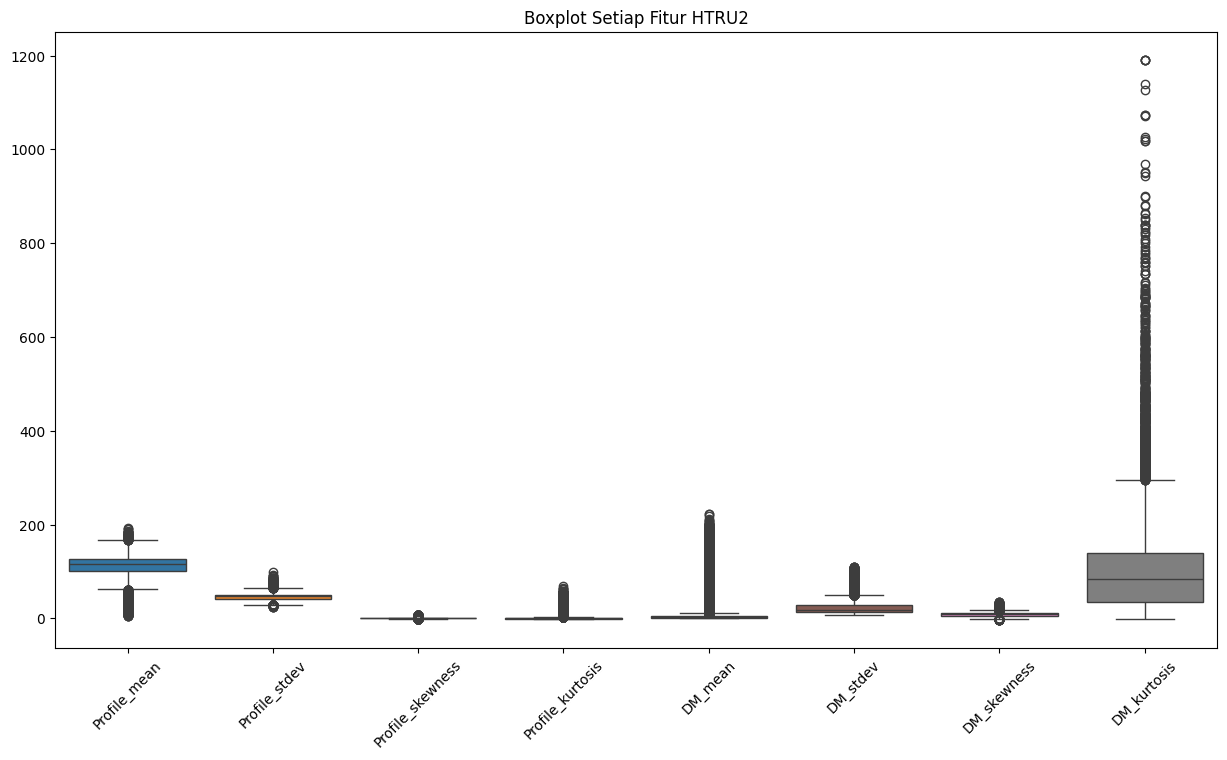

In [37]:
# --- Data Understanding HTRU2 Dataset ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cek dimensi dan tipe data
print("📏 Dimensi dan Tipe Data:")
print(data.shape)         # Hasil: (17898, 9)
print(data.info())        # Semua kolom bertipe float64 atau int64

# 2. Cek nilai hilang (Missing Values)
print("\n🔎 Cek Nilai Hilang:")
print(data.isnull().sum())  # Hasil: Semua 0 → Tidak ada missing values

# 3. Distribusi target (kelas)
print("\n🎯 Distribusi Target (class):")
print(data['class'].value_counts())
# Contoh hasil:
# 0    16259
# 1     1639
# Terlihat ketidakseimbangan kelas (class imbalance)

# 4. Deteksi outlier menggunakan boxplot
print("\n📦 Visualisasi Outlier:")
plt.figure(figsize=(15, 8))
sns.boxplot(data=data.drop(columns='class'))
plt.xticks(rotation=45)
plt.title("Boxplot Setiap Fitur HTRU2")
plt.show()
# Hasil: Terlihat ada outlier signifikan terutama pada fitur:
# 'kurtosis_profile', 'kurtosis_dm_snr', dan 'skewness_dm_snr'


#Preprocessing Data – HTRU2 Pulsar Dataset

* Pada tahap preprocessing, dilakukan normalisasi data menggunakan MinMaxScaler untuk menyamakan skala antar fitur numerik.

* Proses imputasi nilai hilang (missing values) tidak diperlukan karena dataset HTRU2 tidak mengandung nilai kosong.

* Deteksi outlier dilakukan sebagai bagian dari eksplorasi data, namun tidak dilakukan penghapusan karena outlier dapat mengandung informasi penting yang relevan terhadap identifikasi sinyal pulsar.

* Proses seperti binning dan reduksi dimensi tidak dilakukan karena semua fitur bersifat numerik kontinu dan tidak terdapat fitur kategorikal ataupun kebutuhan visualisasi dimensi rendah.

##Normalisasi Data

In [38]:
# --- PREPROCESSING: Normalisasi HTRU2 Dataset ---

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from ucimlrepo import fetch_ucirepo

# 1. Ambil dataset HTRU2 dari UCI
htru2 = fetch_ucirepo(id=372)

# 2. Gabungkan fitur dan target
data = htru2.data.original

# 3. Pisahkan fitur dan label
X = data.drop(columns='class')
y = data['class']

# 4. Normalisasi menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 5. Konversi kembali ke DataFrame
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# 6. Gabungkan kembali dengan label (jika ingin disimpan atau dianalisis)
data_normalized = X_normalized.copy()
data_normalized['class'] = y

# 7. Simpan ke file CSV (opsional)
data_normalized.to_csv("htru2_normalized.csv", index=False)

# 8. Tampilkan ringkasan hasil normalisasi
print("✅ Data berhasil dinormalisasi:")
print(X_normalized.describe())


✅ Data berhasil dinormalisasi:
       Profile_mean  Profile_stdev  Profile_skewness  Profile_kurtosis  \
count  17898.000000   17898.000000      17898.000000      17898.000000   
mean       0.563516       0.294263          0.236676          0.050966   
std        0.137325       0.092467          0.106987          0.088247   
min        0.000000       0.000000          0.000000          0.000000   
25%        0.509180       0.237869          0.191353          0.022939   
50%        0.584919       0.299640          0.211075          0.028480   
75%        0.649199       0.354712          0.236220          0.038912   
max        1.000000       1.000000          1.000000          1.000000   

            DM_mean      DM_stdev   DM_skewness   DM_kurtosis  
count  17898.000000  17898.000000  17898.000000  17898.000000  
mean       0.055566      0.183555      0.303691      0.089553  
std        0.132059      0.188537      0.119591      0.089285  
min        0.000000      0.000000      0.00000

#Klasifikasi & Evaluasi Model – HTRU2 Pulsar Dataset

Klasifikasi dini dilakukan menggunakan lima algoritma klasifikasi yaitu K-Nearest Neighbors (KNN), Naive Bayes, Decision Tree, Logistic Regression, dan Random Forest. Tujuan dari penggunaan kelima algoritma ini adalah untuk membandingkan performa masing-masing metode dalam mendeteksi sinyal pulsar secara dini berdasarkan fitur-fitur numerik yang tersedia pada dataset HTRU2. Setiap model dievaluasi menggunakan metrik akurasi, precision, recall, dan f1-score guna mengetahui efektivitas prediksi yang dilakukan.



##Persiapan (Data Split & Normalisasi)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load data (asumsikan sudah dimuat sebelumnya dalam variabel `data`)
X = data.drop(columns='class')
y = data['class']

# Normalisasi
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


##1️⃣ K-Nearest Neighbors (KNN)

📊 Evaluasi Model KNN
Accuracy: 0.9798882681564246
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4878
           1       0.94      0.84      0.88       492

    accuracy                           0.98      5370
   macro avg       0.96      0.91      0.94      5370
weighted avg       0.98      0.98      0.98      5370



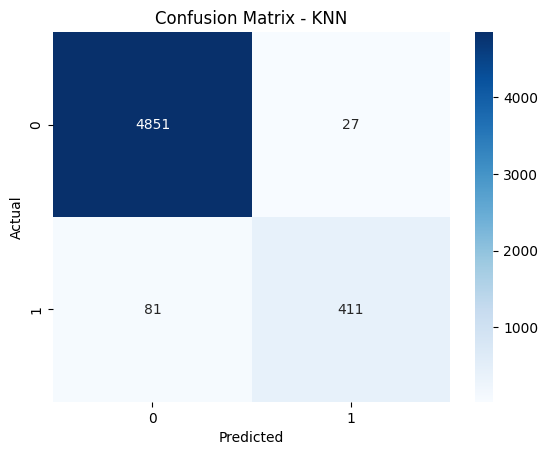

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("📊 Evaluasi Model KNN")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


##2️⃣ Naive Bayes

📊 Evaluasi Model Naive Bayes
Accuracy: 0.9437616387337058
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4878
           1       0.64      0.86      0.74       492

    accuracy                           0.94      5370
   macro avg       0.81      0.91      0.85      5370
weighted avg       0.95      0.94      0.95      5370



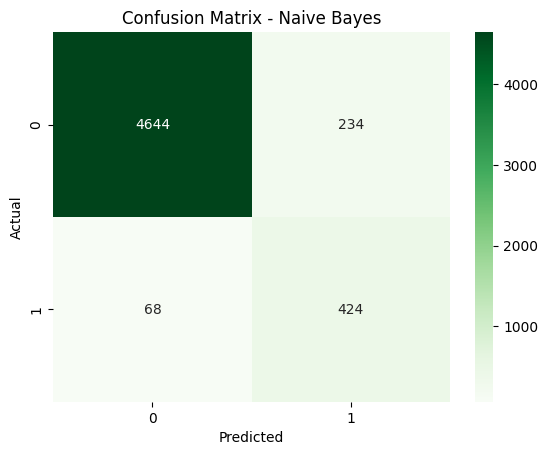

In [41]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("📊 Evaluasi Model Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


##3️⃣ Decision Tree

📊 Evaluasi Model Decision Tree
Accuracy: 0.964804469273743
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4878
           1       0.81      0.81      0.81       492

    accuracy                           0.96      5370
   macro avg       0.89      0.89      0.89      5370
weighted avg       0.96      0.96      0.96      5370



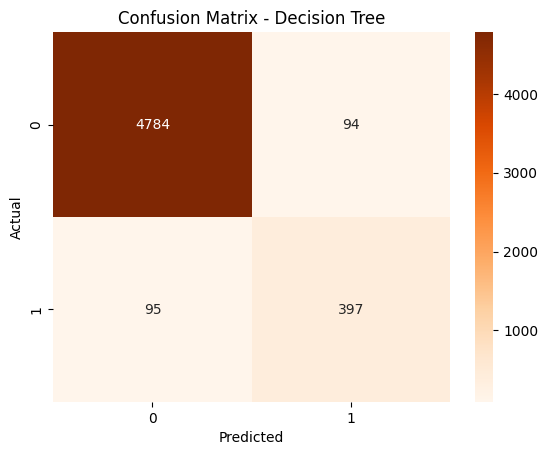

In [42]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("📊 Evaluasi Model Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


##4️⃣ Logistic Regression

📊 Evaluasi Model Logistic Regression
Accuracy: 0.9761638733705773
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4878
           1       0.96      0.77      0.86       492

    accuracy                           0.98      5370
   macro avg       0.97      0.88      0.92      5370
weighted avg       0.98      0.98      0.97      5370



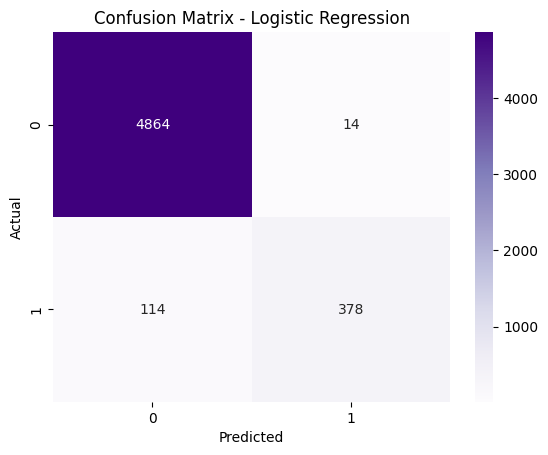

In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("📊 Evaluasi Model Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


##5️⃣ Random Forest


📊 Evaluasi Model Random Forest
Accuracy: 0.9804469273743017
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4878
           1       0.93      0.85      0.89       492

    accuracy                           0.98      5370
   macro avg       0.96      0.92      0.94      5370
weighted avg       0.98      0.98      0.98      5370



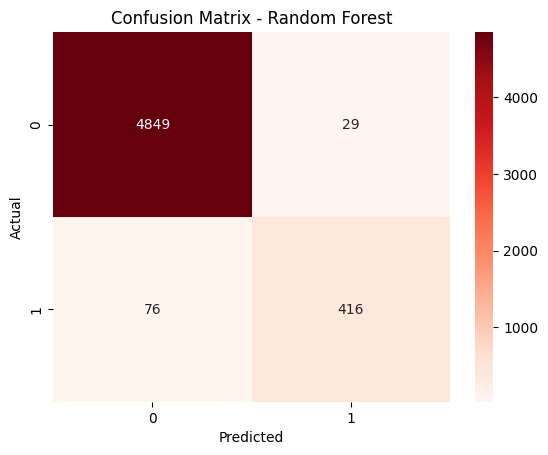

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("📊 Evaluasi Model Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


##Tabel Perbandingan Evaluasi Semua Model

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# --- Asumsikan: variabel 'data' sudah tersedia dan berisi dataset HTRU2 ---
# Pisahkan fitur dan target
X = data.drop(columns='class')
y = data['class']

# --- 1. Normalisasi Data ---
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# --- 2. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# --- 3. Inisialisasi Model ---
models = {
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# --- 4. Evaluasi dan Ringkasan Class 1 ---
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True)
    class1_metrics = report['1']  # Fokus pada class 1 (pulsar)

    results.append({
        'Model': name,
        'Precision': round(class1_metrics['precision'], 4),
        'Recall': round(class1_metrics['recall'], 4),
        'F1-Score': round(class1_metrics['f1-score'], 4),
        'Support': int(class1_metrics['support'])
    })

# --- 5. Tampilkan Tabel Perbandingan Model Secara Rapi ---
df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values(by='F1-Score', ascending=False).reset_index(drop=True)

print("📊 Tabel Perbandingan Evaluasi Semua Model (Class 1):")
print(df_results_sorted)


📊 Tabel Perbandingan Evaluasi Semua Model (Class 1):
                 Model  Precision  Recall  F1-Score  Support
0        Random Forest     0.9348  0.8455    0.8879      492
1                  KNN     0.9384  0.8354    0.8839      492
2  Logistic Regression     0.9643  0.7683    0.8552      492
3        Decision Tree     0.8086  0.8069    0.8077      492
4          Naive Bayes     0.6444  0.8618    0.7374      492
